In [94]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
import random

In [95]:
def f_badering(f_A):
    return f_A*(1-f_A)**6

In [96]:
def make_surface(dim_x, dim_y, f_A):
    surface = np.reshape(np.random.choice(["A", "B"], dim_x*dim_y, p=[f_A, 1-f_A]), (dim_x, dim_y))
    return surface

def make_surface(dim_x, dim_y, f_A):
    n_adams = dim_x*dim_y
    n_As = int(n_adams*f_A)
    n_Bs = n_adams - n_As
    A_list = ["A"]*n_As
    B_list = ["B"]*n_Bs
    All = A_list + B_list
    random.shuffle(All)
    surface = np.reshape(All, (dim_x, dim_y))
    return surface

def find_swim_rings(surface, dim_x, dim_y):
    success = 0
    fails = 0
    for site_x in range(dim_x):
        for site_y in range(dim_y):
            #Looking through each site on the surface
            #Finding the atom in the middle of the swim ring and the atoms in the swim ring
            mid = surface[site_x, site_y]
            swim_ring = [surface[site_x % dim_x, (site_y-1) % dim_y], surface[site_x % dim_x, (site_y+1) % dim_y], surface[(site_x-1) % dim_x, site_y % dim_y], surface[(site_x+1) % dim_x, site_y % dim_y], surface[(site_x-1) % dim_x, (site_y+1) % dim_y], surface[(site_x+1) % dim_x, (site_y-1) % dim_y]]
            
            # Check if the middle is A and the ring is only B
            found = False
            if mid == "A" and not "A" in swim_ring:
                success += 1
            else:
                fails += 1
    
    ratio = success / (success + fails)
    #print(f"Swim-ring check of {dim_x*dim_y} sites complete in {(time.time() - start_time)/1000} s")
    #print(f"Number of swim rings: {success}")
    return success, ratio

In [4]:
# Her skal laves nærmest samme rutine som tidligere, hvor man går igennem alle x, y koordinater 
# og kigger på de 6 naboer med noget relative indexing og looping
start_time = time.time()

# Make surface with the specified ratio
dim_x, dim_y = 100, 100
f_A = 0.2 #float(1/7)
surface = make_surface(dim_x, dim_y, f_A)
ratio = find_swim_rings(surface, dim_x, dim_y)


In [92]:
#Let's run a fucking bunch of these # This takes around 10 minutes. If I had to run it for a long time or bigger data, I'd probably be smart and use 
dim_x, dim_y = 1000, 1000
f_A_range = np.linspace(0, 1, 1000)
successes, ratio_list = [find_swim_rings(make_surface(dim_x, dim_y, f_A), dim_x, dim_y) for f_A in tqdm(f_A_range)]

100%|███████████████████████████████████████| 1000/1000 [28:30<00:00,  1.71s/it]


In [105]:
#ratio_list = [tup[1] for tup in ratio_list]

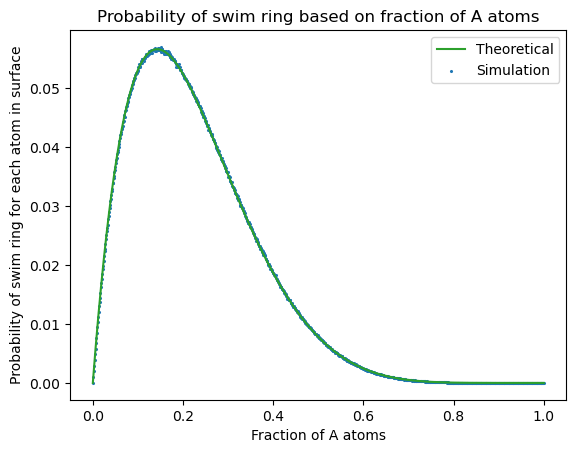

In [109]:
f_BR = f_badering(f_A_range)

plt.plot(f_A_range, f_BR, c = "tab:green", label = "Theoretical")
plt.scatter(f_A_range, ratio_list, s = 1.5, label = "Simulation")
plt.title("Probability of swim ring based on fraction of A atoms")
plt.xlabel("Fraction of A atoms")
plt.ylabel("Probability of swim ring for each atom in surface")
plt.legend()
#plt.savefig("../figures/swim_rings/theory_simulation_comp_big.png", dpi = 300, bbox_inches = "tight")
plt.show()

## Look at an example surface

In [45]:
def find_swim_rings(surface, dim_x, dim_y):
    start_time = time.time()
    success = 0
    fails = 0
    for site_x in range(dim_x):
        for site_y in range(dim_y):
            #Looking through each site on the surface
            #Finding the atom in the middle of the swim ring and the atoms in the swim ring
            mid = surface[site_x, site_y]
            swim_ring = [surface[site_x % dim_x, (site_y-1) % dim_y], surface[site_x % dim_x, (site_y+1) % dim_y], surface[(site_x-1) % dim_x, site_y % dim_y], surface[(site_x+1) % dim_x, site_y % dim_y], surface[(site_x-1) % dim_x, (site_y+1) % dim_y], surface[(site_x+1) % dim_x, (site_y-1) % dim_y]]
            
            # Check if the middle is A and the ring is only B
            found = False
            if mid == "A" and not "A" in swim_ring:
                success += 1
            else:
                fails += 1
    
    ratio = success / (success + fails)
    print(f"Swim-ring check of {dim_x*dim_y} sites complete in {(time.time() - start_time)/1000} s")
    print(f"Number of swim rings: {success}")
    return success


In [8]:
# Et simpelt plotting module ville være super fedt

# I need a function, that takes the index of a position and returns x, y coordinates

# The x position is just the x index times a spacing PLUS a shift which is the y index times half a spacing
# The y position is just the y index times a special spacing, which requires math

def index_to_coordinate(idx_x, idx_y, spacing):
    side_spacing = spacing * 0.5
    up_spacing = spacing * np.sqrt(0.75)
    pos_x = 0
    pos_y = 0
    pos_x += idx_x*spacing
    pos_x += idx_y*side_spacing
    
    pos_y += idx_y*up_spacing
    return pos_x, pos_y

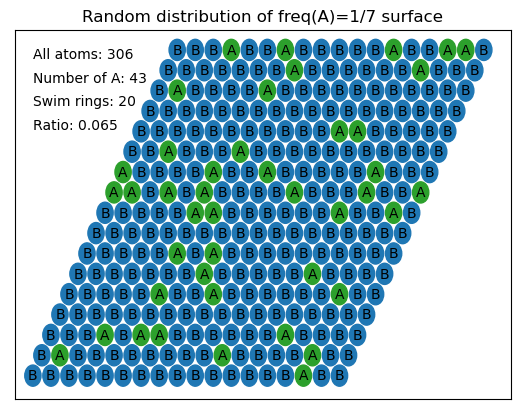

In [91]:
dim_x, dim_y = 18, 17
f_A = 1/7
spacing = 1
colours = {"A": "tab:green", "B": "tab:blue"}
surface = make_surface(dim_x, dim_y, f_A)

fig = plt.figure()

for idx_x in range(dim_x):
    for idx_y in range(dim_y):
        adam = surface[idx_x][idx_y]
        if adam == "A":
            pos_x, pos_y = index_to_coordinate(idx_x, idx_y, spacing)
            circle1 = plt.Circle((pos_x, pos_y), 0.45, color=colours[adam])
            plt.gca().add_patch(circle1)
            #Add a letter to the atom
            plt.text(pos_x, pos_y, "A", horizontalalignment='center',
        verticalalignment='center')
        if adam == "B":
            pos_x, pos_y = index_to_coordinate(idx_x, idx_y, spacing)
            circle1 = plt.Circle((pos_x, pos_y), 0.45, color=colours[adam])
            plt.gca().add_patch(circle1)
            #Add a letter to the atom
            plt.text(pos_x, pos_y, "B", horizontalalignment='center',
        verticalalignment='center')

plt.xlim([-1, dim_x*spacing+dim_y*spacing*0.5])
plt.ylim([-1, dim_y*np.sqrt(0.75)])
plt.xticks([])
plt.yticks([])
plt.title("Random distribution of freq(A)=1/7 surface")

plt.text(x = 0, y = 13.5, s = f"All atoms: {dim_x*dim_y}")
plt.text(x = 0, y = 12.5, s = f"Number of A: {np.count_nonzero(surface == 'A')}")
n_rings, ratio = find_swim_rings(surface, dim_x, dim_y)
plt.text(x = 0, y = 11.5, s = f"Swim rings: {n_rings}")
plt.text(x = 0, y = 10.5, s = f"Ratio: {ratio:.3f}")
plt.savefig("../figures/swim_rings/random_surface_text.png", dpi = 300, bbox_inches = "tight")

plt.show()


In [44]:
np.count_nonzero(surface == 'A')

50

### What does the optimal surface look like? Which would require better than random placement of individual atoms

In [88]:
n = 6
dim_x, dim_y = 3*n, 3*n-1
n_adams = int(dim_x * dim_y / 3)
surface = np.reshape(["A", "B", "B"]*n_adams, (dim_x, dim_y))


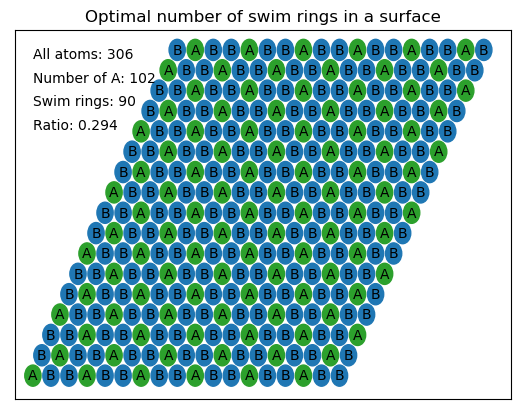

In [90]:
fig = plt.figure()

for idx_x in range(dim_x):
    for idx_y in range(dim_y):
        adam = surface[idx_x][idx_y]
        if adam == "A":
            pos_x, pos_y = index_to_coordinate(idx_x, idx_y, spacing)
            circle1 = plt.Circle((pos_x, pos_y), 0.45, color=colours[adam])
            plt.gca().add_patch(circle1)
            #Add a letter to the atom
            plt.text(pos_x, pos_y, "A", horizontalalignment='center',
        verticalalignment='center')
        if adam == "B":
            pos_x, pos_y = index_to_coordinate(idx_x, idx_y, spacing)
            circle1 = plt.Circle((pos_x, pos_y), 0.45, color=colours[adam])
            plt.gca().add_patch(circle1)
            #Add a letter to the atom
            plt.text(pos_x, pos_y, "B", horizontalalignment='center',
        verticalalignment='center')

plt.xlim([-1, dim_x*spacing+dim_y*spacing*0.5])
plt.ylim([-1, dim_y*np.sqrt(0.75)])
plt.xticks([])
plt.yticks([])
plt.title("Optimal number of swim rings in a surface")
plt.text(x = 0, y = 13.5, s = f"All atoms: {dim_x*dim_y}")
plt.text(x = 0, y = 12.5, s = f"Number of A: {np.count_nonzero(surface == 'A')}")
n_rings, ratio = find_swim_rings(surface, dim_x, dim_y)
plt.text(x = 0, y = 11.5, s = f"Swim rings: {n_rings}")
plt.text(x = 0, y = 10.5, s = f"Ratio: {ratio:.3f}")
plt.savefig("../figures/swim_rings/optimal_surface_text.png", dpi = 300, bbox_inches = "tight")
plt.show()

n_rings, ratio = find_swim_rings(surface, dim_x, dim_y)